## Instructions (important, please read)

1. Type your full name where it says NAME, below

2. Put your solution into the cell that says:
```python
# YOUR CODE HERE
raise NotImplementedError()
```

**(Delete these contents when inputing your solution)**

2. Do not move, add, or delete any cells

3. Make sure your variable names and strings **match the instructions exactly**, (e.g. variable_1 vs Variable_1)

3. If you are not using Colab, please copy and paste your **final answers into Colab**

4. Before you submit, make sure everything runs as expected: 
    * Input your final answers  
    * Go to "Runtime" $\Rightarrow$ "Restart and Run All" 
    * Make sure you don't see any errors

5. Go to "File" $\Rightarrow$ "Download .ipynb"

6. Upload the .ipynb to Canvas (do not change the file name)

**Important Note:** There is an empty cell below your solution, **do not move or delete it** (it contains hidden tests that assign points to your code, deleting it will result in 0 points).

In [ ]:
NAME = "Ahmad Rafi Faqiri"

---

### Predicting concrete compressive strength (nonlinear multivariate regression)

Run the code below to import data for **concrete compressive strength** as a function of multiple independent variables (this function is expected to be highly nonlinear). 

For more information about this dataset, see the UCI Machine Learning repository page:

https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

(Run this code)

In [ ]:
import pandas as pd
import numpy as np
concrete = pd.read_csv('Concrete_Data.csv')

**Problem (5 points)** 

The target variable (which we are trying to predict) is the column labeled:

```python
'Concrete compressive strength(MPa, megapascals) '
```

1. Create a variable called `col_t` with this string (note the space at the end)

2. Use list comprehension to get a list of all the columns **excluding** `col_t` (this will be your complete list of features). Call this list `col_f`

> Hint: `concrete.keys()` will give you a list of column names

In [ ]:
# YOUR CODE HERE
# Create a variable with the target column name
col_t = 'Concrete compressive strength(MPa, megapascals) '

# Get a list of all columns excluding the target column
col_f = [col for col in concrete.keys() if col != col_t]


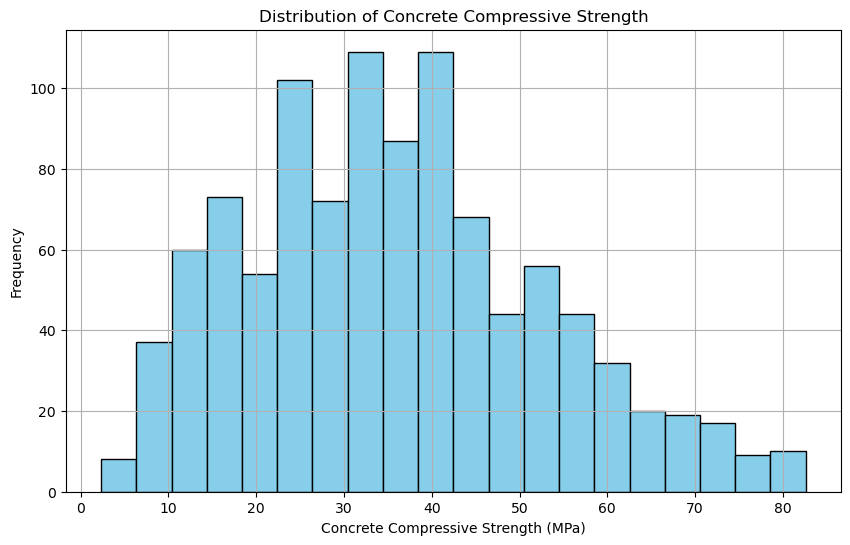

In [2]:
import pandas as pd

# Read the dataset
concrete = pd.read_csv('Concrete_Data.csv')

# Create a variable with the target column name
col_t = 'Concrete compressive strength(MPa, megapascals) '

# Get a list of all columns excluding the target column
col_f = [col for col in concrete.keys() if col != col_t]

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(concrete[col_t], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Concrete Compressive Strength')
plt.xlabel('Concrete Compressive Strength (MPa)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Problem (10 points)**

Using your variables from the last problem `col_f` and `col_t`, divide the data into training and validation sets using:

```python
from sklearn.model_selection import train_test_split
```

* Use the following variable names `X_train`, `X_test`, `y_train`, `y_test`

* Set `test_size` = 0.25

* Set `random_state = 42` in `train_test_split`

In [3]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(concrete[col_f], concrete[col_t], test_size=0.25, random_state=42)

C:\Users\Sushant\AppData\Local\Temp\ipykernel_19860\1320489648.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(concrete[col_t], shade=True, color='skyblue')


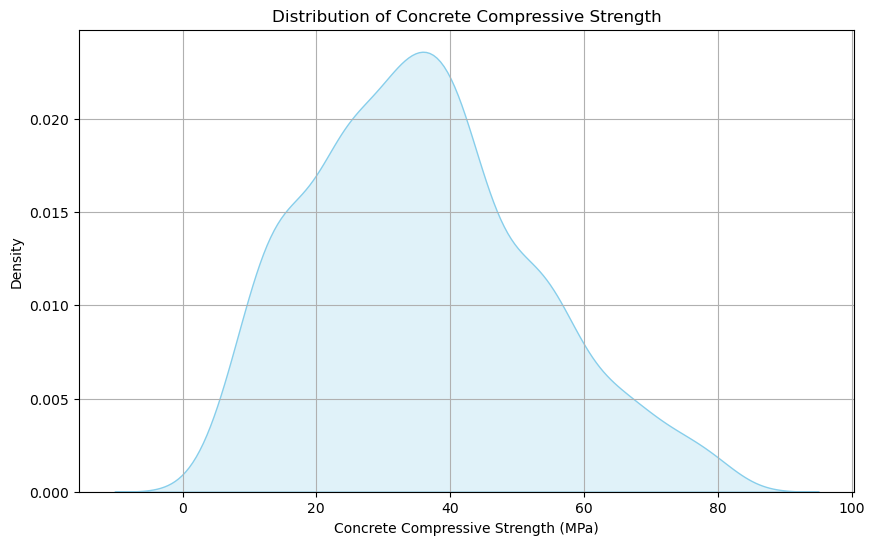

In [5]:
import seaborn as sns

# Plotting
plt.figure(figsize=(10, 6))
sns.kdeplot(concrete[col_t], shade=True, color='skyblue')
plt.title('Distribution of Concrete Compressive Strength')
plt.xlabel('Concrete Compressive Strength (MPa)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

**Problem (10 points)**

Write a Python function, `algorithm_tester(alg, p, xtr, xtst, ytr, ytst)`, with the following specifications:

**Inputs**

* `alg`: an instance of a ML algorithm (e.g. `RandomForestRegressor()`)
* `p`: A `dict` of algorithm hyperparameters to evaluate
* `xtr`: A `Dataframe` of training features
* `xtst`: A `Dataframe` of testing features
* `ytr`: A `Dataframe` of training targets
* `ytst`: A `Dataframe` of testing targets

**Requirements**

The function should perform the following steps:

1. Create a `GridSearchCV()` object, assigned to the variable `gs`. 
    * The grid search should be applied to the algorithm, `alg`
    * It should use the parameter dictionary `p` as the `param_grid`
    * It should use 5-fold cross-validation
    * It should use `scoring='neg_mean_absolute_error'`
2. Fit the grid search, `gs`, on the `xtr` and `ytr` data
3. Make predictions on the `xtst` features using the best model 
    * Use `gs.best_estimator_.predict()`
    * Save these predictions as `y_pred`
4. `return` the **mean absolute error** of the predictions (compared to `ytst`)
    * (Use the code provided)

In [6]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

def algorithm_tester(alg, p, xtr, xtst, ytr, ytst):
# YOUR CODE HERE
# Create GridSearchCV object
    gs = GridSearchCV(alg, param_grid=p, cv=5, scoring='neg_mean_absolute_error')
    
    # Fit the grid search on training data
    gs.fit(xtr, ytr)
    
    # Make predictions on testing data
    y_pred = gs.best_estimator_.predict(xtst)
    
    # Return mean absolute error
    return mean_absolute_error(ytst, y_pred)

In [8]:
import matplotlib.pyplot as plt

def plot_algorithm_results(parameter_values, mean_absolute_errors):
    plt.figure(figsize=(10, 6))
    plt.plot(parameter_values, mean_absolute_errors, marker='o', color='skyblue', linestyle='-')
    plt.xlabel('Parameter Values')
    plt.ylabel('Mean Absolute Error')
    plt.title('Algorithm Performance')
    plt.grid(True)
    plt.show()

**Problem (5 points)**

1. Instantiate a single decision tree regressor, called `dt`
    * (No arguments should be passed to `DecisionTreeRegressor()`)

2. Create a parameter grid dictionary, `dt_p` with only one entry: `{'random_state': [42]}`

In [9]:
from sklearn.tree import DecisionTreeRegressor

# YOUR CODE HERE
# Instantiate a single decision tree regressor
dt = DecisionTreeRegressor()

# Create a parameter grid dictionary for decision tree
dt_p = {'random_state': [42]}

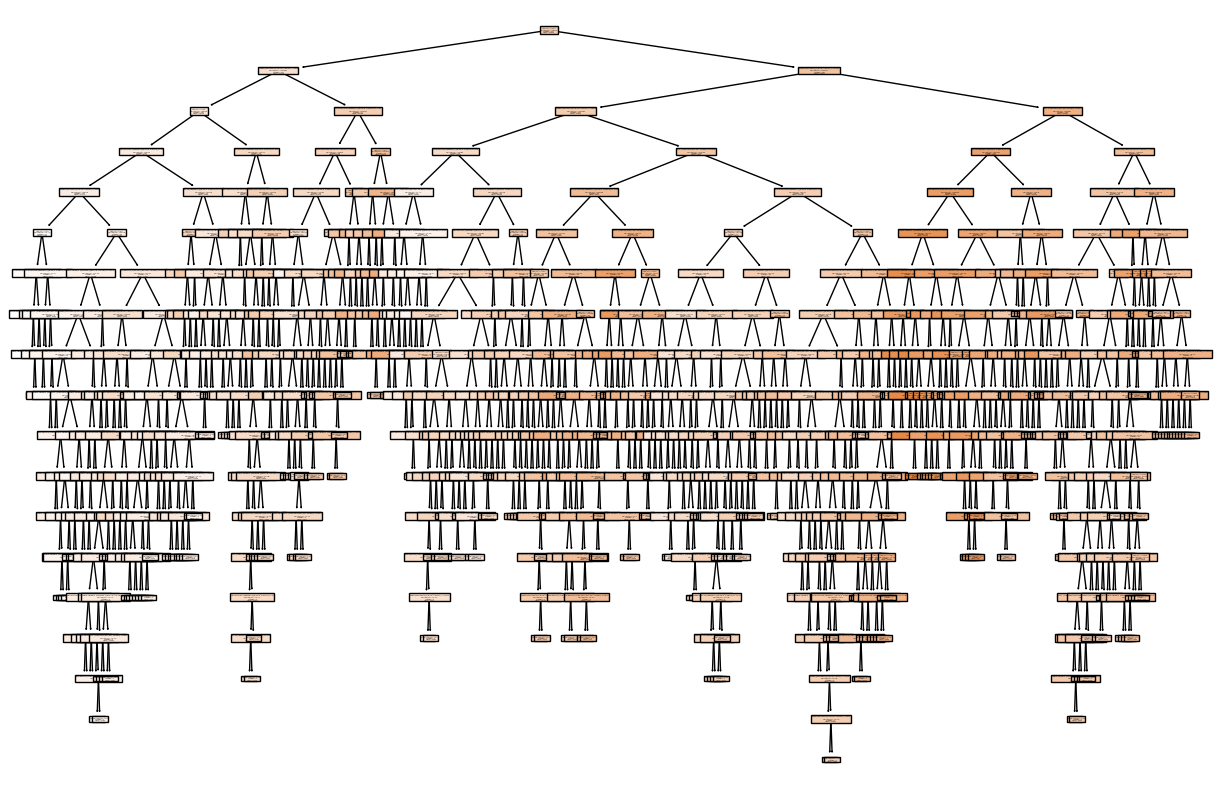

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Train the decision tree regressor
dt.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(dt, filled=True, feature_names=X_train.columns)
plt.show()

**Problem (5 points)**

1. Instantiate a Random Forest regressor , called `rf`

2. Create a parameter grid dictionary, `rf_p` with the following entries: 

    * `'max_depth': range(2,50,4)`
    * `'n_estimators': range(100,200,50)`
    * `'max_features': range(1,8,2)`
    * `'random_state': [42]`

In [12]:
from sklearn.ensemble import RandomForestRegressor
# YOUR CODE HERE
# Instantiate a Random Forest regressor
rf = RandomForestRegressor()

# Create a parameter grid dictionary
rf_p = {
    'max_depth': range(2, 50, 4),
    'n_estimators': range(100, 200, 50),
    'max_features': range(1, 8, 2),
    'random_state': [42]
}

**Problem (5 points)**

Compare the mean absolute error of the Random Forest to the individual Decision Tree:

1. Create a dictionary, `algs`, to store your algorithms and parameter grids.
    * Have one key be `'Decision Tree'`
    * Have `'Decision Tree'` map to the list: `[dt, dt_p]`
    * Have another key be `'Random Forest'`
    * Have `Random Forest` map to the list: `[rf, rf_p]`
2. Use a `for` loop to loop over the keys in `algs`:
    * `for k in algs.keys():`
3. Make use of the string in the variable `k`, in each loop, to pass each algorithm and its parameters to `algorithm_tester()`
    * Also pass `X_train, X_test, y_train, y_test` to `algorithm_tester()` 
4. Use an f string to print the performance of the algorithm within the loop. 

Here's part of the solution:

```python
for k in algs.keys():
    res = algorithm_tester(...,...,X_train, X_test, y_train, y_test) 
    print(f'The mean absolute error of the {...} is {...}')
```
(This will take a few minutes to run) 

In [15]:
# YOUR CODE HERE
# Create a dictionary to store algorithms and parameter grids
algs = {'Decision Tree': [dt, dt_p], 'Random Forest': [rf, rf_p]}

# Loop over the keys in algs
for k in algs.keys():
    # Extract algorithm and parameter grid
    alg = algs[k][0]
    params = algs[k][1]
    
    # Perform algorithm testing
    res = algorithm_tester(alg, params, X_train, X_test, y_train, y_test)
    
    # Print the performance of the algorithm
    print(f'The mean absolute error of the {k} is {res}')

The mean absolute error of the Decision Tree is 4.797054263565891
The mean absolute error of the Random Forest is 3.736089432749253


**Problem (10 points)** 

If you've done everything correctly, the Random Forest should have performed better (had lower mean absolute error)

Explain, in your own words, why Random Forest produces a better prediction than a single decision tree.

YOUR ANSWER HERE

In [16]:
#Random Forest typically outperforms a single decision tree due to its ensemble nature and the use of bagging and random feature selection techniques.

#1. Ensemble Method: Random Forest is an ensemble learning method that combines the predictions of multiple individual decision trees. Each tree is trained on a random subset of the data and provides its own prediction. The final prediction of the Random Forest is obtained by averaging (regression) or voting (classification) the predictions of all individual trees. This ensemble approach often leads to more robust and accurate predictions compared to a single decision tree.
#2. Reduction of Overfitting: By averaging or voting over multiple trees, Random Forest reduces the tendency of individual trees to overfit the training data. Overfitting occurs when a model captures noise or random fluctuations in the training data, leading to poor generalization performance on unseen data. Random Forest mitigates this issue by building diverse trees and aggregating their predictions, resulting in a more generalized model.
#3. Random Feature Selection: Random Forest performs random feature selection during the tree-building process. At each split in each tree, only a random subset of features is considered for determining the best split. This randomness helps decorrelate the individual trees in the ensemble and improves the diversity of the trees, leading to better overall performance.
#4. Handling Non-linear Relationships: Random Forest can capture complex non-linear relationships between features and the target variable by combining multiple decision trees. Each tree learns different aspects of the data, and their collective predictions result in a more flexible and expressive model compared to a single decision tree.
#Overall, Random Forest's ability to reduce overfitting, leverage the wisdom of crowds through ensemble learning, and handle non-linear relationships make it a powerful and effective algorithm for various regression and classification tasks.
